<h1><center>INF 283 - Exercise 8</center></h1>
<h2><center> Sindre Eik de Lange </center><h2>

### K-means

> Lloyd's algorithm

In [1]:
import os
import numpy as np

# kmeans clustering algorithm
# data = set of data points
# k = number of clusters
# c = initial list of centroids (if provided)
#
def kmeans(data, k, c=None):
    centroids = []

    centroids = randomize_centroids(data, centroids, k)  

    old_centroids = [[] for i in range(k)] 

    iterations = 0
    while not (has_converged(centroids, old_centroids, iterations)):
        iterations += 1

        clusters = [[] for i in range(k)]

        # assign data points to clusters
        clusters = euclidean_dist(data, centroids, clusters)

        # recalculate centroids
        index = 0
        for cluster in clusters:
            old_centroids[index] = centroids[index]
            centroids[index] = np.mean(cluster, axis=0).tolist()
            index += 1

    '''
    print("The total number of data instances is: " + str(len(data)))
    print("The total number of iterations necessary is: " + str(iterations))
    print("The means of each cluster are: " + str(centroids))
    print("The clusters are as follows:")
    for cluster in clusters:
        print("Cluster with a size of " + str(len(cluster)) + " starts here:")
        print(np.array(cluster).tolist())
        print("Cluster ends here.")
    '''
    return clusters

# Calculates euclidean distance between
# a data point and all the available cluster
# centroids.      
def euclidean_dist(data, centroids, clusters):
    for instance in data:  
        # Find which centroid is the closest
        # to the given data point.
        mu_index = min([(i[0], np.linalg.norm(instance-centroids[i[0]])) \
                            for i in enumerate(centroids)], key=lambda t:t[1])[0]
        try:
            clusters[mu_index].append(instance)
        except KeyError:
            clusters[mu_index] = [instance]

    # If any cluster is empty then assign one point
    # from data set randomly so as to not have empty
    # clusters and 0 means.        
    for cluster in clusters:
        if not cluster:
            cluster.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())

    return clusters


# randomize initial centroids
def randomize_centroids(data, centroids, k):
    for cluster in range(0, k):
        centroids.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())
    return centroids


# check if clusters have converged    
def has_converged(centroids, old_centroids, iterations):
    MAX_ITERATIONS = 1000
    if iterations > MAX_ITERATIONS:
        return True
    return old_centroids == centroids

> Sklearn.cluster.KMeans

In [2]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
np.random.seed(0)
# ============
# Generate datasets
# ============
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X, y = (np.dot(X, transformation), y)

# your method ->
centers = kmeans(X, 3)
colors = [] # colors for plot
new_centers = [] # reshape, the old way
for i in range(len(centers)):
    colors.extend([i] * len(centers[i]))
    new_centers.extend(centers[i])

# sklearn version
centersSKL = cluster.MiniBatchKMeans(n_clusters=3)
centersSKL.fit(X)
y_pred = centersSKL.predict(X)

# ============
# Set up figure settings
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
x = [ x[0] for x in new_centers]
y = [ x[1] for x in new_centers]
plt.subplot(1, 2, 1) # your subplot
plt.scatter(x, y, c=colors)
plt.xticks(());plt.yticks(())
plt.subplot(1, 2, 2) # sklearn subplot
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xticks(());plt.yticks(())
plt.show()

<Figure size 2100x1250 with 2 Axes>

#### 1.3 Random Initialization

I would assume it could work to use random initialization of the centroids, because as stated in a previous task, the algorithms are able to converge towards to a minimum. However, it is also stated that this is a local minimum, which is why one would want to initialize the centroids in such a way that one optimizes the chances of converging towards the global minimum, or at least something close to it. 

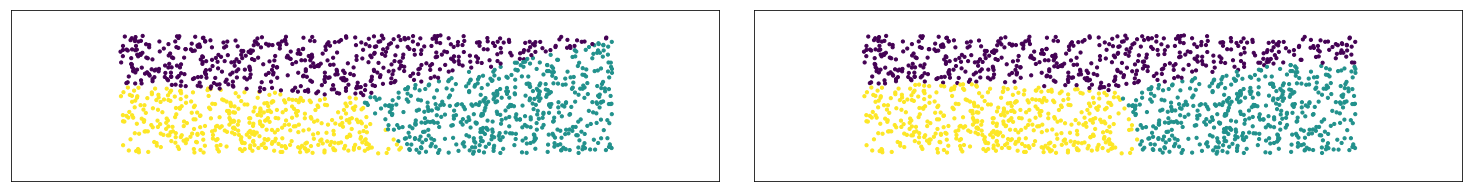

In [3]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
np.random.seed(0)
# ============
# Generate datasets
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = (np.dot(X, transformation), y)

# The datasets, shown as rows
datasets = [(noisy_circles, {'damping': .77, 'preference': -240, 'quantile': .2, 'n_clusters': 2}), (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}), (aniso, {'eps': .15, 'n_neighbors': 2}), (blobs, {}), (no_structure, {})]

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=3)
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')

# the algorithms shown as colors
clustering_algorithms = (('MiniBatchKMeans', two_means), ('GaussianMixture', gmm))

# ============
# Set up figure settings
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5)); plot_num = 1
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
hspace=.01)
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # split in data and classes
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

for name, algorithm in clustering_algorithms:
    algorithm.fit(X)
    y_pred = algorithm.predict(X)
    # make plot fancy
    plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
    if i_dataset == 0:
        plt.title(name, size=18)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
    plt.xlim(-2.5, 2.5);plt.ylim(-2.5, 2.5)
    plt.xticks(());plt.yticks(())
    plot_num += 1
plt.show()

#### KMeans vs. Gaussian Mixture

KMeans works better when there are scarce ressources, and one has high dimensional (linear) data, while Gaussian Mixture works better when one has low dimensional (non-linear) data, and one does not necessarily care about the shape of the clusters. 

## Hierarchical Clustering

0125455

1034344

2303233

5430122

4321022

5432201

5432210



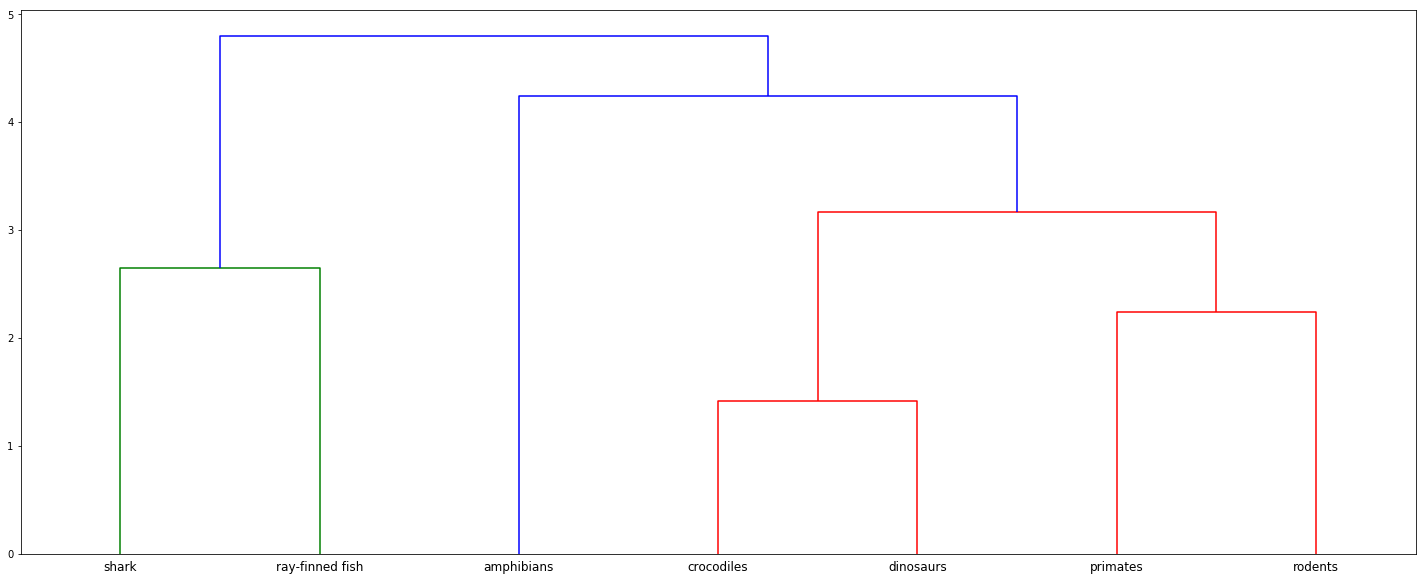

In [8]:
import scipy.cluster.hierarchy as hier
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist
import numpy as np
import distance # <- you most likely need pip install distance here

data = ["ATGTAAA", "ATGAAAA", "ACGTGAA", "ACGAGGG", "ACGAGGA", "ACGAGTC", "ACGAGCC"]
labels = ["shark", "ray-finned fish", "amphibians", "primates", "rodents", "crocodiles", "dinosaurs"]

# The levenshtein distance matrix ->
mat = np.zeros((len(data), len(data)), dtype=int)
for i in range(0, len(data)):
    for j in range(0, len(data)):
        mat[i][j] = distance.levenshtein(data[i], data[j])
        print(mat[i][j], end="")
    print("\n")
mat = pdist(mat) # make an upper triangle matrix

# The hierarchy clustering ->
# here run scipy.cluster.hierarchy.linkage() on triangle matrix
z = hier.linkage(mat)
fig = plt.figure(figsize=(25, 10))
# here run scipy.cluster.hierarchy.dendrogram() with the linkage z and labels = labels
dn = hier.dendrogram(z, labels = labels)
plt.show()